# Assignment3

1. sklearn 패키지를 사용해 로지스틱 회귀모형으로 데이터를 분석해 주세요 
2. 성능지표를 계산하고 이에 대해 해석해 주세요 
   - sklearn : mean accuracy, f1 score 등 다양한 성능지표 계산 
   - confusion matrix : tp, fp, fn, tn 값을 통해 성능지표 계산  
3. 어떤 성능지표를 기준으로 성능을 개선을 시도했고, 그러한 선택의 이유를 적어주세요.
4. **해석을 상세하게 달아주세요 !**

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data = pd.read_csv("assignment3_creditcard.csv")

In [3]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


target변수인 `Class`의 경우 범주형 변수로 변환시켜 주었다.

In [4]:
data["Class"] = pd.Series(data["Class"], dtype = "category")

In [5]:
features = data.iloc[:, :-1]
target = data.iloc[:, -1]

In [6]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,...,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000
mean,-0.015438,0.053653,-0.046031,0.037348,-0.033724,-0.003299,-0.051054,0.006064,-0.018530,-0.041149,...,0.007183,0.002633,0.010289,-0.000656,-0.004800,-0.000897,-0.001989,-0.000765,0.000948,0.001535
std,2.031529,1.616186,1.758169,1.482109,1.486998,1.339259,1.454827,1.364342,1.134065,1.252593,...,0.827420,0.720307,0.847152,0.739469,0.593663,0.603349,0.517968,0.483852,0.397075,0.296736
min,-30.552380,-42.172688,-31.103685,-5.560118,-42.147898,-21.929312,-41.506796,-39.267378,-13.434066,-24.403185,...,-4.619034,-21.387122,-21.453736,-8.887017,-36.666000,-2.718024,-6.712624,-2.241620,-7.418878,-9.617915
25%,-0.916927,-0.575381,-0.899872,-0.843321,-0.714901,-0.763757,-0.568146,-0.206103,-0.661909,-0.543450,...,-0.459073,-0.209678,-0.225520,-0.539244,-0.160583,-0.356047,-0.318619,-0.327343,-0.070558,-0.052189
50%,0.020050,0.075358,0.180610,-0.008844,-0.060040,-0.271363,0.036107,0.022463,-0.055095,-0.097390,...,0.002111,-0.062792,-0.028778,0.007302,-0.011199,0.040006,0.019770,-0.056260,0.002049,0.011075
75%,1.317461,0.806957,1.029928,0.771958,0.613328,0.397269,0.559409,0.329606,0.605704,0.460681,...,0.467781,0.131199,0.184312,0.526358,0.146835,0.437146,0.352717,0.240713,0.091637,0.078911
max,2.399484,21.467203,4.069865,11.927512,32.911462,22.529298,36.677268,20.007208,8.113152,15.236028,...,5.228342,26.237391,27.202839,8.361985,9.637187,3.948061,2.510401,3.122747,11.135740,14.929133


describe()를 보았을 때 분포가 일정하지 않은 것으로 보인다. 따라서 scaling이 필요하며, minmax scaler를 이용하였다.

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

s_features = pd.DataFrame(scaler.fit_transform(features), columns= features.columns)

In [8]:
s_features.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,...,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000
mean,0.926714,0.663520,0.882983,0.320081,0.561078,0.493178,0.530233,0.662568,0.622611,0.614594,...,0.469792,0.449133,0.441133,0.515181,0.791764,0.407605,0.727596,0.417730,0.399891,0.391878
std,0.061651,0.025396,0.049986,0.084752,0.019811,0.030124,0.018608,0.023017,0.052632,0.031600,...,0.084024,0.015125,0.017411,0.042870,0.012821,0.090510,0.056160,0.090197,0.021400,0.012088
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.899356,0.653636,0.858708,0.269722,0.552003,0.476073,0.523619,0.658989,0.592752,0.601923,...,0.422444,0.444675,0.436287,0.483957,0.788400,0.354327,0.693265,0.356851,0.396037,0.389689
50%,0.927791,0.663861,0.889427,0.317440,0.560728,0.487149,0.531347,0.662845,0.620914,0.613176,...,0.469277,0.447760,0.440330,0.515643,0.791626,0.413741,0.729955,0.407385,0.399950,0.392267
75%,0.967164,0.675357,0.913573,0.362089,0.569699,0.502188,0.538041,0.668026,0.651582,0.627254,...,0.516566,0.451833,0.444710,0.545734,0.795039,0.473317,0.766055,0.462745,0.404779,0.395030
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


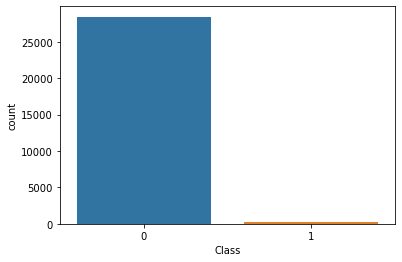

In [9]:
sns.countplot(target)

**심한 불균형 데이터 셋**임을 확인할 수 있다. 따라서 정확도가 높게 나올 것으로 예상된다. 그러나 이 데이터 셋은 카드 사기 데이터이기 때문에 궁극적으로 우리가 원하는 것은 `fraud`를 잘 예측하는 것이다. 정확도는 non-fraud만 잘 예측하더라도(즉, 모두 0으로 예측한다 하더라도) 높게 나올 수 있다. 따라서, 정확도를 기준으로 모델 평가지표로 활용하면 우리가 원하는 카드사기 적발 문제를 풀기 어렵다. 따라서, 따라서 정확도 보다는 `정밀도`, `재현율` 등의 지표를 개선하고자 노력할 것이다. 

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

데이터를 나눌때 train과 test가 동일한 class 값을 값도록 하였다.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(s_features, target, test_size=0.2, random_state = 11, stratify = target)

In [12]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(22942, 28) (5736, 28) (22942,) (5736,)


In [13]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [14]:
y_pred = model.predict(X_test) 
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
pred_proba = model.predict_proba(X_test)[:, -1].reshape(-1,1)

In [16]:
from sklearn.metrics import *

In [17]:
f1_score(y_pred, y_test)

0.7407407407407408

**classification report**

In [18]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5704
           1       0.61      0.94      0.74        32

    accuracy                           1.00      5736
   macro avg       0.81      0.97      0.87      5736
weighted avg       1.00      1.00      1.00      5736



평균 정확도는 1에 가까운 아주 높은 값을 보였다. 그 외 다른 지표들도 높은 값을 기록하여, 모델 성능이 좋은 것을 확인할 수 있었다. 

### Confusion Matrix

In [19]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

p = fn + tp
n = tn + fp

**Accuracy(정확도)** : 전체 데이터중에서 맞게 분류된 데이터의 비율

In [20]:
accuracy = (tp + tn) / (p + n)
print("Accuracy : ", accuracy) 

Accuracy :  0.9963389121338913


**Error Rate(오류율)** : 전체 데이터 중에서 잘못 분류한 값의 비율

In [21]:
errorRate = (fn + fp) / (p+n)
print("Error Rate : ", errorRate)

Error Rate :  0.0036610878661087866


**Recall(Sensitivity : 재현율)** : 원래 positive 데이터에서 positive 로 분류된 수

In [22]:
recall = (tp) / p
print("Recall : ", recall)

Recall :  0.6122448979591837


**Precision(정밀도)** : Positive 로 예측한 데이터 중에 실제 positive 인 비율

In [23]:
precision = tp/ (tp + fp)
print("precision : ", precision)

precision :  0.9375


**Specificity(특이도)** : negative로 판단한 내용 중에 실제 negative 인 비율


In [24]:
specificity =  tn / (tn + fp)
print("specificity : ", specificity)

specificity :  0.9996483207314929


**False Positive Rate (위양성률)** : Negative 로 판단한 값 중에 잘못 판단한 비율(실제로는 positive)

In [25]:
fpr = fp / n
print("FPR : ", fpr) 

FPR :  0.0003516792685071215


**f1_score** : Recall과 Precision의 조화평균

In [26]:
f1 = f1_score(y_pred, y_test)
print("f1 : ", f1)

f1 :  0.7407407407407408


**ROC 커브** : ROC 커브는 모델의 임계값을 조정

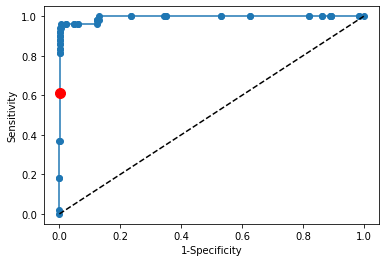

In [27]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.decision_function(X_test))

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, 'o-', label="Logistic Regression") 
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([1-specificity], [recall], 'ro', ms=10) # 현재 cutoff value 값 
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()

**AUC** : AUC는 ROC 곡선 아래의 너비로, 1에 가까울 수록 좋은 모델


In [28]:
from sklearn.metrics import auc
print("auc : ", auc(fpr, tpr))

auc :  0.9942905947327058


auc값이 0.99로 높은 것을 확인할 수 있다. 하지만 **현재의 cut-off value 값은 최적점이 아니다**.

`cut-off value`가 무엇인지 간단하게 알아보자. 예를 들어, 이 사람이 암인지 아닌지를 판단해야 한다고 하자. 모형에 따라 이 사람이 암일 가능성이 70%일 때 우리는 이 사람이 암이라고 해야 할까, 암이 아니라고 해야할까? 80%일 때는 또 어떻게 판단해야 할까? 이처럼 판단의 기준이 되는 경계가 cut-off이다. 

앞서 살펴보았듯, 본 데이터는 **심한 불균형 data set**이다. 암으로 예측되는 경우는 흔한 일이 아니기 때문에, 1보다는 0이 나올 가능성이 훨씬 크다. 그렇기에 **logistic 함수로 구한 성공확률은 기존에 설정한 cut-off 값보다 낮을 가능성이 크다**. 때문에 우리는 cut-off 값을 낮추어 새로운 값으로 모델을 예측하여야 한다. 

## Find Optimal cut-off value

최적의 cut-off 값은 보통 $(sensitivity) - (1-specificity) = k$ 일 때, 가장 큰 $k$ 값으로 정한다. 따라서 아래와 같이 식을 전개하였다.

In [29]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

optimal_pred = model.decision_function(X_test) > optimal_threshold

### Confusion Matrix

In [30]:
tn, fp, fn, tp = confusion_matrix(y_test, optimal_pred).ravel()

p = fn + tp
n = tn + fp

**Accuracy(정확도)** : 전체 데이터중에서 맞게 분류된 데이터의 비율

In [31]:
accuracy = (tp + tn) / (p + n)
print("Accuracy : ", accuracy) 

Accuracy :  0.9942468619246861


**Error Rate** : 전체 데이터 중에서 잘못 분류한 값의 비율

In [32]:
errorRate = (fn + fp) / (p+n)
print("Error Rate : ", errorRate)

Error Rate :  0.005753138075313808


**Recall(Sensitivity : 재현율)** : 원래 positive 데이터에서 positive 로 분류된 수

In [33]:
recall = (tp) / p
print("Recall : ", recall)

Recall :  0.9387755102040817


**Precision(정밀도)** : Positive 로 예측한 데이터 중에 실제 positive 인 비율

In [34]:
precision = tp/ (tp + fp)
print("precision : ", precision)

precision :  0.6052631578947368


**Specificity(특이도)** : negative로 판단한 내용 중에 실제 negative 인 비율


In [35]:
specificity =  tn / (tn + fp)
print("specificity : ", specificity)

specificity :  0.9947248109723932


**False Positive Rate (위양성률)** : Negative 로 판단한 값 중에 잘못 판단한 비율(실제로는 positive)

In [36]:
fpr = fp / n
print("FPR : ", fpr) 

FPR :  0.005275189027606823


**f1_score** : Recall과 Precision의 조화평균

In [37]:
f1 = f1_score(y_pred, y_test)
print("f1 : ", f1)

f1 :  0.7407407407407408


**ROC 커브** : ROC 커브는 모델의 임계값을 조정

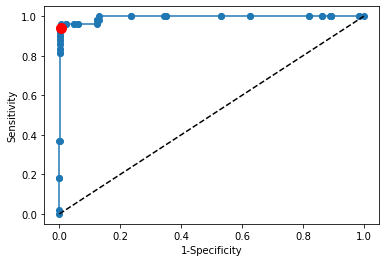

In [38]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.decision_function(X_test))

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, 'o-', label="Logistic Regression") 
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([1-specificity], [recall], 'ro', ms=10) # 현재 cutoff value 값 
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()

**AUC** : AUC는 ROC 곡선 아래의 너비로, 1에 가까울 수록 좋은 모델


In [39]:
from sklearn.metrics import auc
print("auc : ", auc(fpr, tpr))

auc :  0.9942905947327058


### 개선 전 후 지표 비교

1. 개선 전 ROC curve
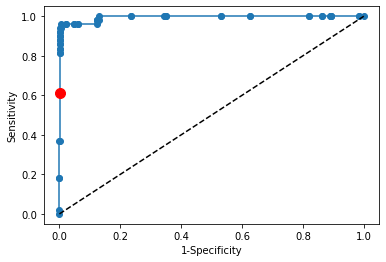

2. 개선 후 ROC curve
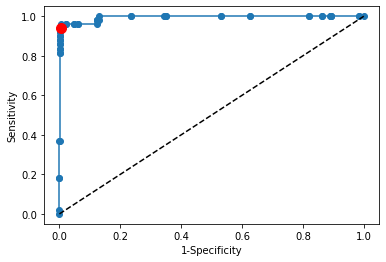

|값|Before|After|
|------|---|---|
|정확도|0.99633|0.99424|
|오류율|0.00366|0.00575|
|재현율|0.61224|0.93877|
|정밀도|0.93750|0.60526|
|특이도|0.99964|0.99472|
|위양성률|0.00035|0.00527|
|f1 score|0.74074|0.74074|
|AUC|0.99429|0.99429|

- 먼저, 그래프에서 개선 전 cut-off는 최적점이 아니었으나 **개선 후 cut-off는 최적점에 가깝게 위치가 바뀐 것**을 확인할 수 있었다. 


- 지표들을 비교해보았을 때, **재현율에서 큰 향상**이 있었던 것을 확인할 수 있었다. 그러나, 정밀도에서는 큰 폭의 하락이 있어 **재현율과 정밀도가 상충관계**에 있음을 확인하였다. 


- 재현율과 정밀도가 상충관계를 가지는 이유는 그 식에 있다. 정밀도의 경우에는 분모에 FP가 있고, 재현율의 경우에는 FN이 있다. 따라서 cut-off를 높여 모든 값을 0으로 예측한다면 FN 값이 커져 정밀도는 증가하나, FP 값은 작아져 재현율은 떨어진다. 


- 앞서 말했듯, logistic 함수로 구한 성공확률은 기존에 설정한 cut-off 값보다 낮을 가능성이 크다. 따라서 우리는 기존의 cut-off 값을 낮추어 새로운 cut-off를 제안하였다. 이 때문에 FP 값이 커져 재현율이 향상되었고, FN 값이 작아져 정밀도가 하락한 것을 확인할 수 있다.


- `재현율`과 `정밀도`는 모두 중요한 지표이다. 그러나 본 데이터는 **카드 사기 데이터 셋이기에 재현율이 정밀도 보다 중요한 지표**라고 할 수 있다. 예를 들어, 실제로 정상 거래를 카드 사기라고 예측한다면 고객이 항의할 것이고, 자세한 검토를 통해 정상 거래라고 확인되면 해당 예측을 철회하면 된다. 그러나 카드 사기를 정상 거래라고 판단한다면 이는 회사에 큰 타격을 입힐 수 있다. 


- 금융권은 **신뢰**와 직결된 사업이다. 카드 사기에 대해 철저하게 검사하는 것이, 오히려 소비자의 신뢰를 높이는 수단이 될 수도 있다. 카드 사기를 정상 거래라고 판단하는 일이 지속된다면, 이는 소비자의 신뢰를 훼손시키고 추가적인 피해로 이어질 수 있다.


- 상황에 따라 정밀도가 더 중요한 경우가 있고, 재현율이 더 중요한 경우가 있다. 경우에 따라 임계값을 조정해 정밀도와 재현율 수치를 조정해야 할 것이다. 앞서 말했듯 카드 사기는 `재현율`이 더욱 중요한 지표라고 할 수 있고, 이에 따라 개선 후의 정확도나 정밀도가 더 낮을지라도, **재현율이 큰 폭으로 개선되었으므로 더 나은 결과로 바뀌었다**고 말할 수 있을 것이다.